# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [2]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [3]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1519744464000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.5.8","count":292},"features":[{"type":"Feature","properties":{"mag":5,"place":"54km WSW of Mendi, Papua New Guinea","time":1519739907080,"updated":1519743240647,"tz":600,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/us2000d8q3","detail":"https://earthquake.usgs.gov


In [4]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [5]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 5, 'place': '54km WSW of Mendi, Papua New Guinea', 'time': 1519739907080, 'updated': 1519743240647, 'tz': 600, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us2000d8q3', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us2000d8q3.geojson', 'felt': 1, 'cdi': 9.1, 'mmi': None, 'alert': None, 'status': 'reviewed', 'tsunami': 1, 'sig': 386, 'net': 'us', 'code': '2000d8q3', 'ids': ',us2000d8q3,', 'sources': ',us,', 'types': ',dyfi,geoserve,origin,phase-data,', 'nst': None, 'dmin': 4.939, 'rms': 0.67, 'gap': 28, 'magType': 'mww', 'type': 'earthquake', 'title': 'M 5.0 - 54km WSW of Mendi, Papua New Guinea'}, 'geometry': {'type': 'Point', 'coordinates': [143.203, -6.3793, 14.7]}, 'id': 'us2000d8q3'}


In [6]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [143.203, -6.3793, 14.7], 'type': 'Point'}
{'alert': None,
 'cdi': 9.1,
 'code': '2000d8q3',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us2000d8q3.geojson',
 'dmin': 4.939,
 'felt': 1,
 'gap': 28,
 'ids': ',us2000d8q3,',
 'mag': 5,
 'magType': 'mww',
 'mmi': None,
 'net': 'us',
 'nst': None,
 'place': '54km WSW of Mendi, Papua New Guinea',
 'rms': 0.67,
 'sig': 386,
 'sources': ',us,',
 'status': 'reviewed',
 'time': 1519739907080,
 'title': 'M 5.0 - 54km WSW of Mendi, Papua New Guinea',
 'tsunami': 1,
 'type': 'earthquake',
 'types': ',dyfi,geoserve,origin,phase-data,',
 'tz': 600,
 'updated': 1519743240647,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us2000d8q3'}


In [7]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 5.0 - 54km WSW of Mendi, Papua New Guinea
M 4.6 - 101km W of Mendi, Papua New Guinea
M 4.8 - Fiji region
M 4.9 - 20km SW of Mendi, Papua New Guinea
M 4.9 - 51km WSW of Mendi, Papua New Guinea
M 2.8 - 60km W of Anchor Point, Alaska
M 2.6 - 18km SE of Yosemite Valley, CA
M 4.7 - 28km WSW of Isangel, Vanuatu
M 5.2 - 96km W of Mendi, Papua New Guinea
M 5.6 - 71km WSW of Mendi, Papua New Guinea
M 4.8 - 70km WSW of Mendi, Papua New Guinea
M 2.9 - 61km N of Tierras Nuevas Poniente, Puerto Rico
M 4.9 - 104km WSW of Porgera, Papua New Guinea
M 2.8 - 11km SSW of Boca de Yuma, Dominican Republic
M 5.5 - 77km N of Isangel, Vanuatu
M 2.5 - 56km W of Anchor Point, Alaska
M 4.5 - 136km SE of Akutan, Alaska
M 5.2 - 57km SW of Mendi, Papua New Guinea
M 4.6 - 126km S of Severo-Kuril'sk, Russia
M 5.0 - 89km SW of Porgera, Papua New Guinea
M 5.1 - 46km SW of Mendi, Papua New Guinea
M 4.5 - 60km W of Mendi, Papua New Guinea
M 2.5 - 62km ENE of Cantwell, Alaska
M 4.9 - 33km S of Tinogasta, Argentina
M 4.3

In [8]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

292


In [9]:
# print the first few lines of data

print(df.head())

    depth  magnitude
0   14.70        5.0
1   10.00        4.6
2  532.71        4.8
3   21.10        4.9
4   20.86        4.9


In [10]:
# print some descriptive statistics

print(df.describe())

            depth   magnitude
count  292.000000  292.000000
mean    42.898459    3.956952
std     71.503493    0.983635
min     -2.100000    2.450000
25%     10.000000    2.927500
50%     20.480000    4.200000
75%     43.055000    4.800000
max    613.840000    7.500000


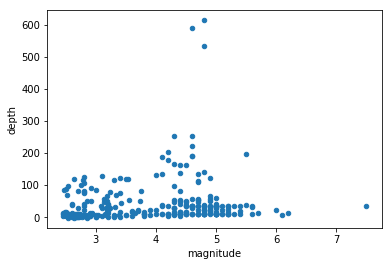

In [11]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [12]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [13]:
# read it back later

new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print(new_df.head())

    depth  magnitude
0   14.70        5.0
1   10.00        4.6
2  532.71        4.8
3   21.10        4.9
4   20.86        4.9


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [14]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [15]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=young+library+uky


In [16]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'error_message': 'You have exceeded your daily request quota for this API. We recommend registering for a key at the Google Developers Console: https://console.developers.google.com/apis/credentials?project=_', 'results': [], 'status': 'OVER_QUERY_LIMIT'}


In [17]:
# if needed google_key = ''

In [18]:
# print it more nicely

pp.pprint(data)

{'error_message': 'You have exceeded your daily request quota for this API. We '
                  'recommend registering for a key at the Google Developers '
                  'Console: '
                  'https://console.developers.google.com/apis/credentials?project=_',
 'results': [],
 'status': 'OVER_QUERY_LIMIT'}


In [19]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

In [20]:
endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': '152 East Fourth St, Lexington, KY 40508'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=152+East+Fourth+St%2C+Lexington%2C+KY+40508


In [21]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'error_message': 'You have exceeded your daily request quota for this API. We recommend registering for a key at the Google Developers Console: https://console.developers.google.com/apis/credentials?project=_', 'results': [], 'status': 'OVER_QUERY_LIMIT'}


In [22]:
pp.pprint(data)

{'error_message': 'You have exceeded your daily request quota for this API. We '
                  'recommend registering for a key at the Google Developers '
                  'Console: '
                  'https://console.developers.google.com/apis/credentials?project=_',
 'results': [],
 'status': 'OVER_QUERY_LIMIT'}


In [23]:
for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

In [24]:
# 2,500 free requests per day, calculated as the sum of client-side and server-side queries.
# 50 requests per second, calculated as the sum of client-side and server-side queries.

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [25]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [26]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [27]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [28]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

The 360-degree gigapixel photo from Saturday’s @KentuckyMBB game is here! If you were there, go to… https://t.co/v2q4D6Soin
RT @UKTix: A clear bag policy will once again be in effect at this year's @SEC Men's &amp; Women's Basketball Tournaments.

INFO: https://t.co/…
RT @KentuckyMBB: Quite the week for @JVando, capped by his first career @SEC Freshman of the Week honors:

🔵 Led UK wins over Arkansas and…
RT @UKBaseball: Congrats to @CollettTj on being named one of @CBNewspaper's National Players of the Week after hitting four HRs and driving…
RT @KentuckyMBB: Hello there, @AP_Top25. It's good to be back.

We check in at No. 23 this week after a two-week break.


In [29]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Feb 26 17:18:35 +0000 2018',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 35583547,
                                 'id_str': '35583547',
                                 'indices': [3, 15],
                                 'name': 'Kentucky Basketball',
                                 'screen_name': 'KentuckyMBB'},
                                {'id': 61824637,
                                 'id_str': '61824637',
                                 'indices': [30, 39],
                                 'name': 'AP Top 25',
                                 'screen_name': 'AP_Top25'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 968173460898885633,
 'id_str': '968173460898885633',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_t

### Other API endpoints allow different types of searches

In [30]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @dennisasmith02: #BBN https://t.co/Ng4IeWDU0F

RT @mrs_toes: #BBN  The Brow stays hot in February https://t.co/gnW2QWyVKF

RT @roAnne: 2 miles done!!! Feels so good sweating in the rain! #BBN representin' 💙 https://t.co/ep7RYO3SpY

#BBN https://t.co/Ng4IeWDU0F

👍 #BBN https://t.co/vND49EBbPA



In [31]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @_akshaykumar__: #सोनिया का दामाद,
#लालू का दामाद,
#पवार का दामाद,
और अब #अमरिंदर का दामाद !!

ये कोंग्रेसी घोटालेबाज़ को ही दामाद चुनते…

RT @RaviDas46406918: #हमको_भी_मरना_है 
यह जीवन हर हट का कुआं लोई ।
           या गल बंदा है सब कोई ।।कीड़ी कुंजर और अवतारा।
         हरहट…

RT @AbhishekDas210: #TuesdayThoughts
#हमको_भी_मरना_है ये इस संसार का नियम है जो जन्म लेता है, वे मरता भी है।पर सोचने की बात यह है कि क्या ह…

@sexy14963907 @Laila3624 @jeetendragamit2 मेरा वाला  केसा है https://t.co/qlv8baS19A

@Shehla_Rashid @vineetjaintimes @timesofindia Kitne aaye? 10-20 aaye ya nahi.



In [32]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

New Blog Post Why are You Inflexible?  https://t.co/zG4DQ8ETsK

Yay Monday’s 😭 https://t.co/RRC48Yid9I

No reason to dread Mondays When Pilates is an option! Start your day and week feeling long,… https://t.co/s3qe9u0w25

Just a few days left for our February Special!! Three privates for just… https://t.co/4wuMHix6pQ

It may be rainy 🌨 outside… But it’s nice and shiny in the studio. Getting ready for a couple… https://t.co/pHspmEq0ze

Another reason to #LoveYourLibrary -- you can find fascinating letters and papers written by… https://t.co/cGSRVDj8Wm

“Take God seriously, take other people seriously, take yourself lightly, and take your emotions the lightest.” @mattdampier

When you can’t decide which of your new reformers to play on ...you play on all of them!… https://t.co/w1xNdMH6KF

They are here!!! New Reformers in the house 🎉
.
.
#shinepilatesstudio #sharethelex… https://t.co/7wwj3shjFt

There’s still time to sign up for our last event of Raise the Dough tonight at 6pm! There is 

### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

In [33]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#batman', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

#Batman #CutestPet #iHeartAwards

#Batman #CutestPet #iHeartAwards

@BatmanxElla never been hurt #Batman #CutestPet #iHeartAwards

RT @BaseLovatics: Retweet for Batman.
#Batman
#CutestPet
#iHeartAwards https://t.co/xv9Waifclg

RT @SVMT93: @BatmanxElla @selflovato_ TELL ME YOU LOVE ME #Batman #CutestPet #iHeartAwards



### Bonus: Streaming live tweets in real time 

In [34]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Tue Feb 27 15:14:52 +0000 2018
Norfolk, NE, United States
Want to work in #Norfolk, NE? View our latest opening: https://t.co/oc30P4BqL3 #Nurse #RN #nursepractitioner #Job #Jobs #Hiring

Tue Feb 27 15:14:52 +0000 2018
Brasília, Brasil, Brasil
@saIvagni Hehehehehehehe vsf

Tue Feb 27 15:14:52 +0000 2018
Petaluma, CA, United States
@jaronrayhinds Outsmart clickbait with our new chrome extension on PH.
https://t.co/3PxidPf9uS

Tue Feb 27 15:14:52 +0000 2018
Seabra, Brasil, Brasil
@BiaArantes Que tiro foi esse? Minina Bia arretada! Isso que se faz! Iluminarti kkk

Tue Feb 27 15:14:52 +0000 2018
أبوظبي, الامارات العربية المتحدة, الامارات العربية المتحدة
اللهم ارحم جدي ثبته عند السؤال💛

Tue Feb 27 15:14:52 +0000 2018
Irving, TX, United States
Anyone can be in the MCU tbh!!! https://t.co/Ep4306Axkj

Tue Feb 27 15:14:52 +0000 2018
Offutt Air Force Base, NE, United States
Want to work at Booz Allen? We're #hiring in #OffuttAFB, NE! Click for details: https://t.co/wXlCGhHSD2 #BoozAllen… https://

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

In [35]:
def

    endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

    params = {'address': 'earthquake'}

    url = requests.Request('GET', endpoint, params=params).prepare().url
    print(url)

SyntaxError: invalid syntax (<ipython-input-35-5db5e8fb1d7d>, line 1)

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
